In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [206]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [207]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [208]:
df.loc[:122,'region']=1
df.loc[122:,'region']=0

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [210]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
region         0
dtype: int64

In [211]:
df=df.dropna().reset_index(drop=True)

In [212]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [213]:
df.loc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
region                 0.0
Name: 122, dtype: object

In [214]:
df=df.drop(122).reset_index(drop=True)

In [215]:
df.loc[122]

day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
region                 0.0
Name: 122, dtype: object

In [216]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [217]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [218]:
df.columns=df.columns.str.strip()

In [219]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [220]:
col=df.columns.to_list
col

<bound method IndexOpsMixin.tolist of Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')>

In [221]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [222]:

df.loc[122]

day                     01
month                   06
year                  2012
Temperature             32
RH                      71
Ws                      12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
region                 0.0
Name: 122, dtype: object

In [223]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.6+ KB


In [225]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [226]:
df[['FFMC','DMC','ISI','BUI','FWI','region']]=df[['FFMC','DMC','ISI','BUI','FWI','region']].astype(float)

In [227]:
df[['Rain','DC']]=df[['Rain','DC']].astype(float)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [229]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [230]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [231]:
df['Classes']=df['Classes'].str.strip()

In [232]:
df.to_csv('cleaned_data.csv',index=False)

In [233]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [235]:
## Now we will do feature selection and finnd out our dependent and indipendent features. 
## and the training data for our model.

In [236]:
X=df.drop(['day','month','year'],axis=1)

In [237]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [238]:
X.Classes=X.Classes.map({'not fire':0,'fire':1})

In [239]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0


In [240]:
X.corr(
    
)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,-0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,-0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,-0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,-0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,-0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,-0.197102


In [241]:
import seaborn as sns

In [242]:
sns.heatmap(X.corr(),annot=True,fmt=".2f",linecolor="White")

<Axes: >

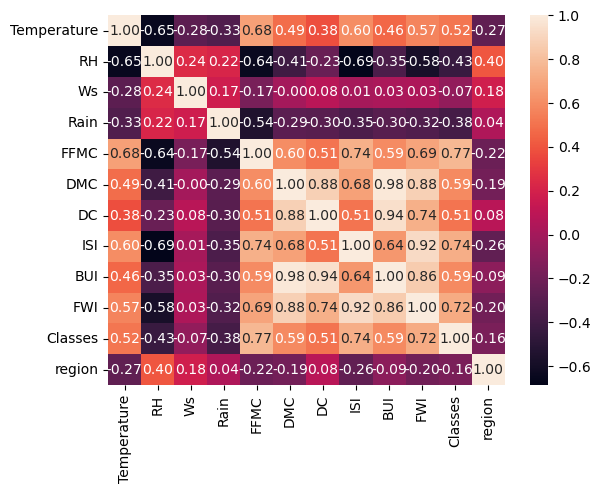

In [243]:
plt.show()

In [244]:
X.hist(bins=50,figsize=(20,15))


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'region'}>]], dtype=object)

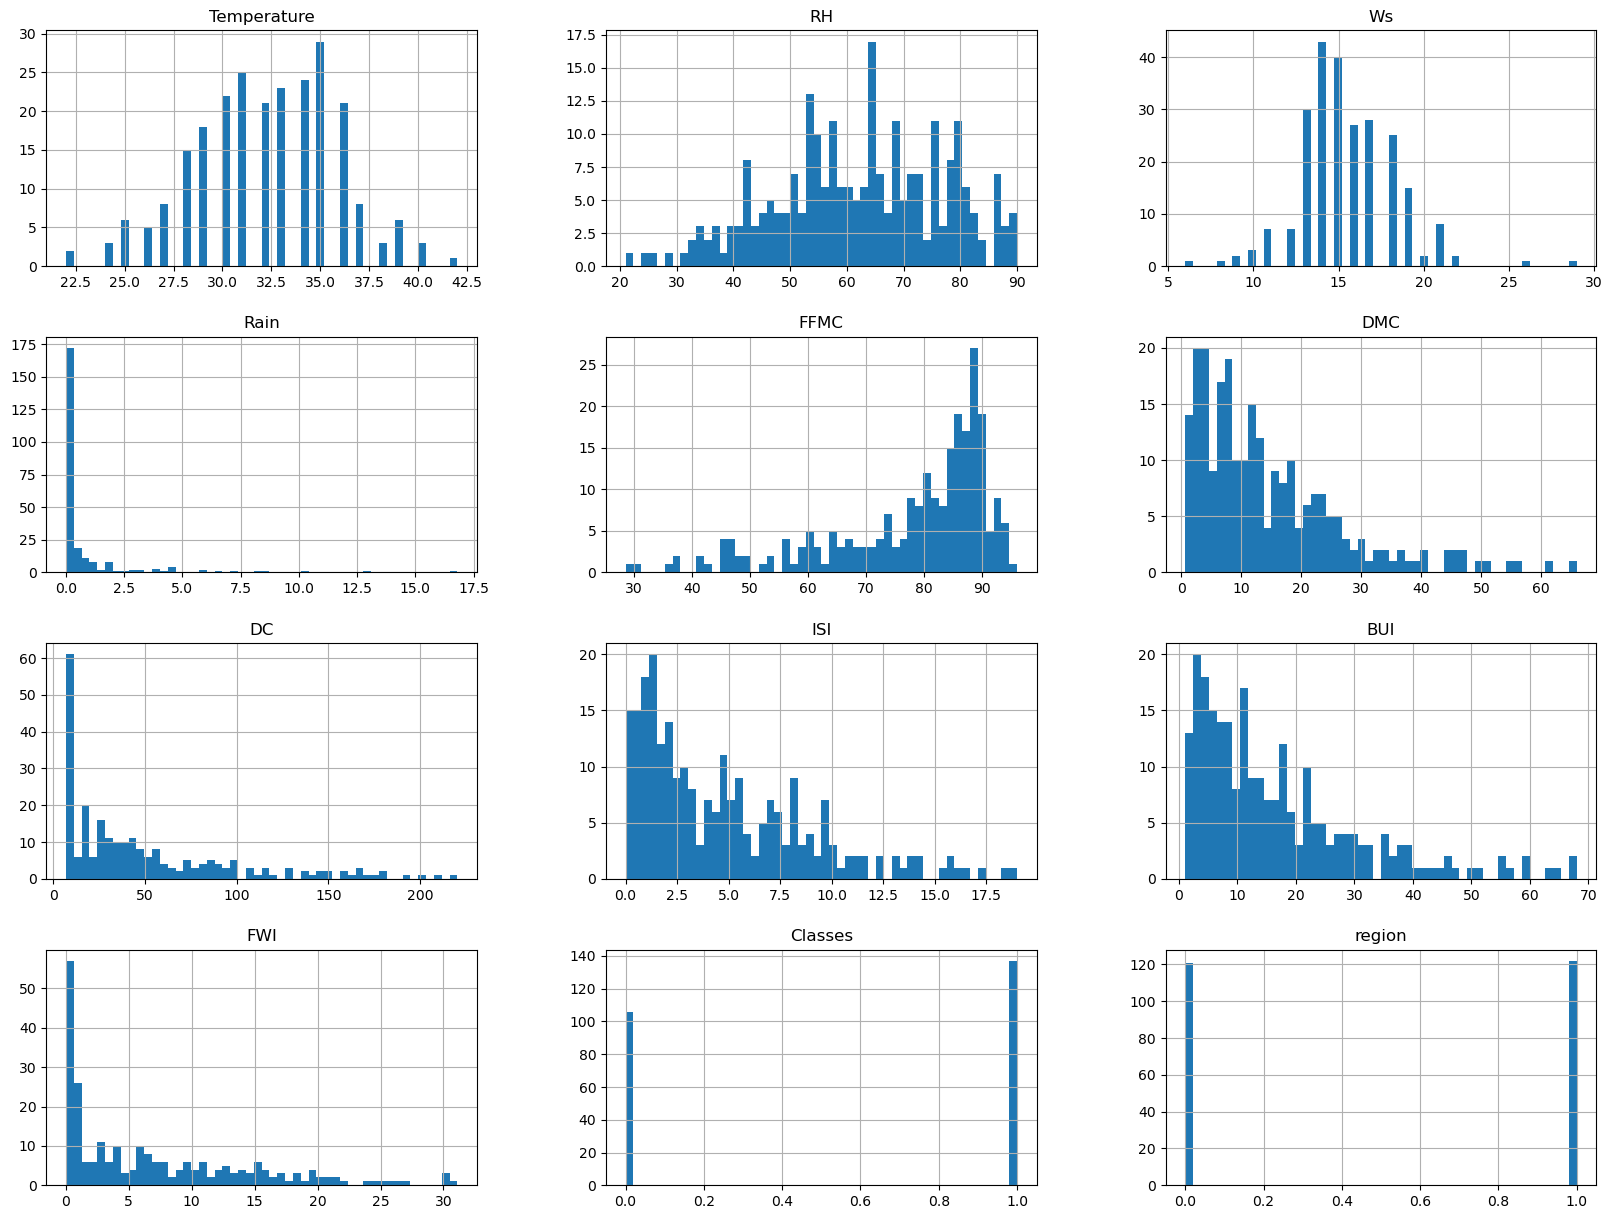

In [245]:
plt.show()

In [246]:
prev_X=X.copy()

In [247]:
prev_X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0


In [248]:
prev_y=prev_X['FWI']
prev_X.drop('FWI',inplace=True,axis=1)

In [249]:
X.skew()

Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
Classes       -0.258846
region        -0.008282
dtype: float64

In [250]:
skew_col=X.columns[X.skew().abs()>=1]

In [251]:
skew_col


Index(['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')

In [252]:
## applying log normal transformation.
for col in skew_col:
    X[col]=np.log1p(X[col])

In [253]:
X.hist(bins=50,figsize=(20,15))

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'region'}>]], dtype=object)

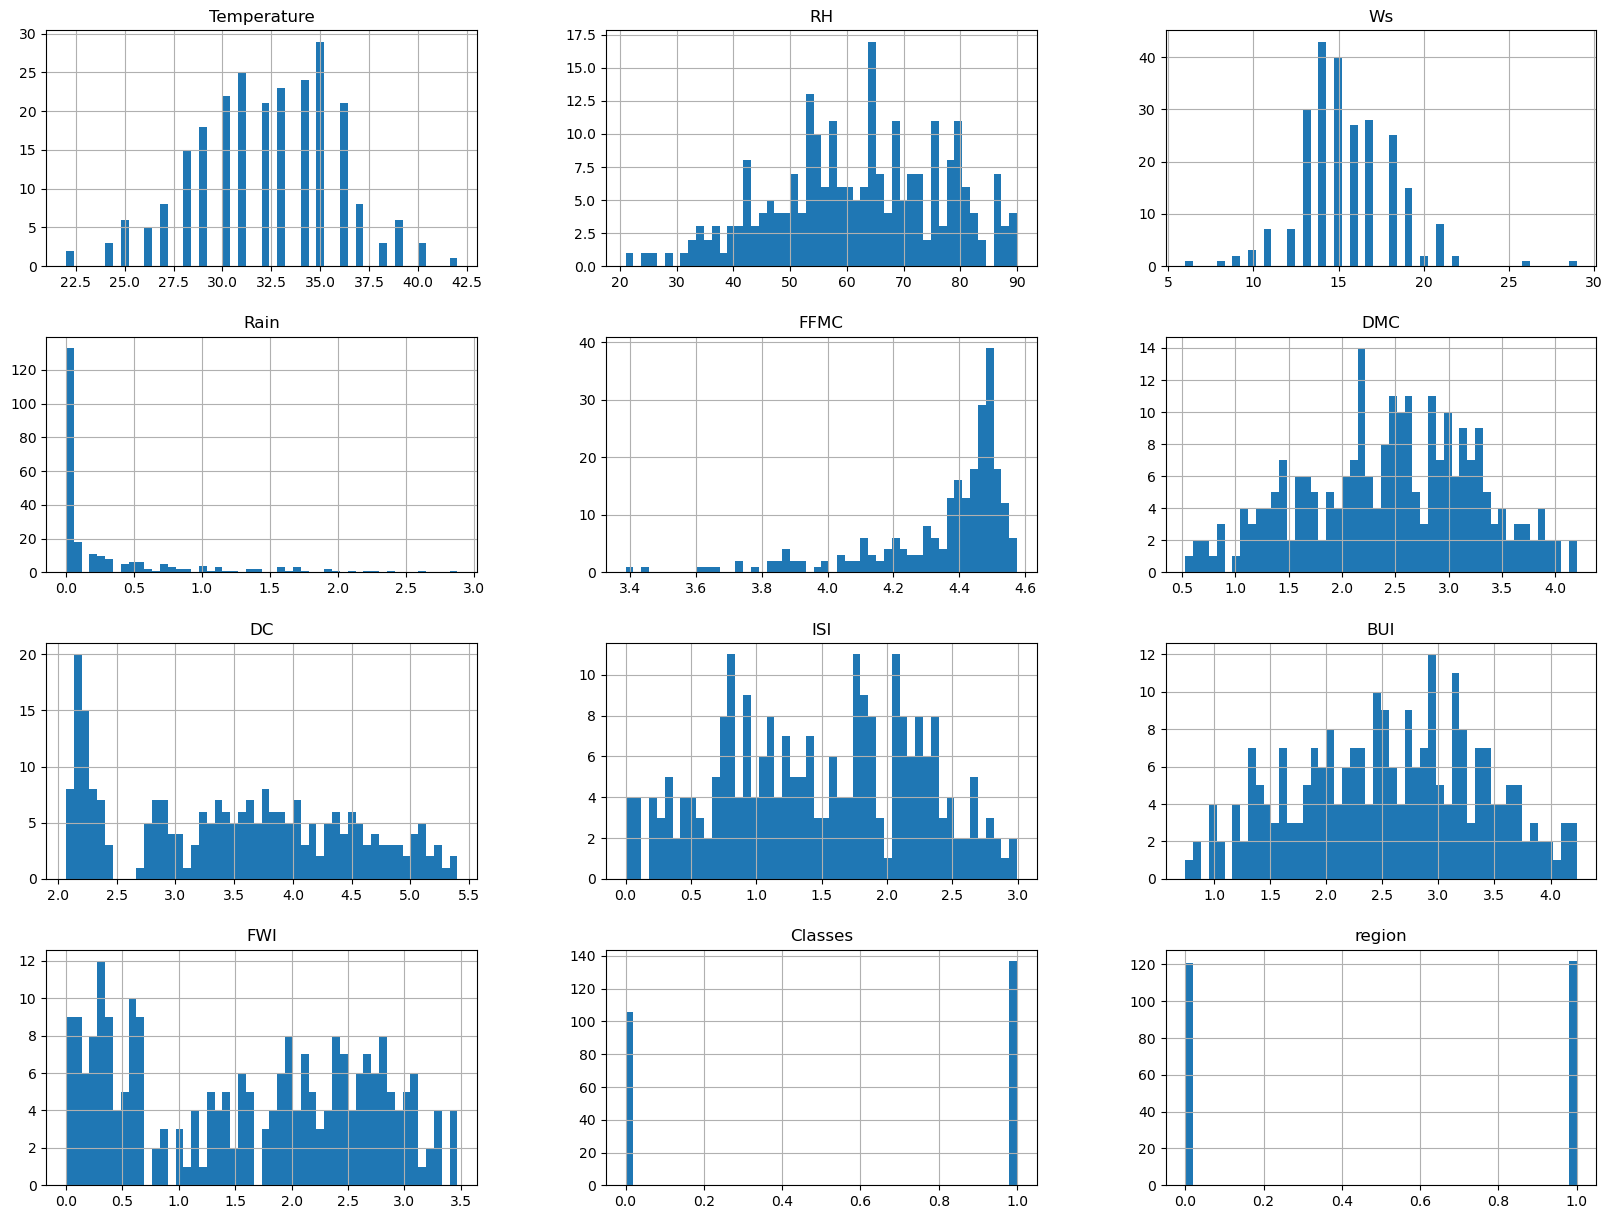

In [254]:
plt.show()

In [255]:
X.skew()

Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           2.207224
FFMC          -1.837617
DMC           -0.184266
DC             0.087862
ISI           -0.065109
BUI           -0.089787
FWI           -0.022792
Classes       -0.258846
region        -0.008282
dtype: float64

In [256]:
X['Rain'].median()

0.0

In [257]:
X['Rain'].describe()

count    243.000000
mean       0.322339
std        0.567089
min        0.000000
25%        0.000000
50%        0.000000
75%        0.405465
max        2.879198
Name: Rain, dtype: float64

In [258]:
## lets check the outlier in all the dataset
sns.boxplot(X,orient='v')

<Axes: >

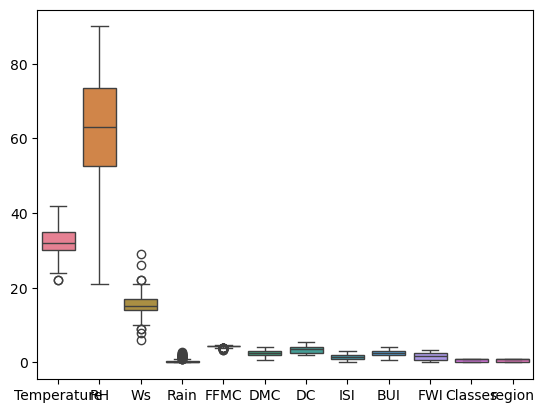

In [259]:
plt.show()

In [260]:
## Lets discuss about the multicolinearity.
## get our independent and dependent feature.

In [261]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.000000,4.200205,1.481605,2.151762,0.832909,1.481605,0.405465,0,1.0
1,29,61,13,0.832909,4.180522,1.629241,2.151762,0.693147,1.589235,0.336472,0,1.0
2,26,82,22,2.646175,3.873282,1.252763,2.091864,0.262364,1.308333,0.095310,0,1.0
3,25,89,13,1.252763,3.387774,0.832909,2.066863,0.000000,0.993252,0.000000,0,1.0
4,27,77,16,0.000000,4.186620,1.386294,2.721295,0.788457,1.589235,0.405465,0,1.0


In [262]:
y=X['FWI']
y

0      0.405465
1      0.336472
2      0.095310
3      0.000000
4      0.405465
         ...   
238    2.014903
239    0.000000
240    0.182322
241    0.530628
242    0.405465
Name: FWI, Length: 243, dtype: float64

In [263]:
X.drop('FWI',axis=1,inplace=True)

In [264]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.000000,4.200205,1.481605,2.151762,0.832909,1.481605,0,1.0
1,29,61,13,0.832909,4.180522,1.629241,2.151762,0.693147,1.589235,0,1.0
2,26,82,22,2.646175,3.873282,1.252763,2.091864,0.262364,1.308333,0,1.0
3,25,89,13,1.252763,3.387774,0.832909,2.066863,0.000000,0.993252,0,1.0
4,27,77,16,0.000000,4.186620,1.386294,2.721295,0.788457,1.589235,0,1.0


In [265]:
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.359079,0.657839,0.609248,0.457068,0.662393,0.578721,0.516015,-0.269555
RH,-0.651400,1.000000,0.244048,0.233241,-0.622137,-0.521312,-0.324820,-0.671788,-0.475814,-0.432161,0.402682
Ws,-0.284510,0.244048,1.000000,0.116882,-0.162326,-0.077791,0.003986,-0.036047,-0.049596,-0.069964,0.181160
Rain,-0.359079,0.233241,0.116882,1.000000,-0.668784,-0.508639,-0.597658,-0.621151,-0.539206,-0.536797,0.007212
FFMC,0.657839,-0.622137,-0.162326,-0.668784,1.000000,0.770509,0.675664,0.864518,0.763032,0.709941,-0.214717
DMC,0.609248,-0.521312,-0.077791,-0.508639,0.770509,1.000000,0.874473,0.817153,0.988680,0.700033,-0.237644
DC,0.457068,-0.324820,0.003986,-0.597658,0.675664,0.874473,1.000000,0.729205,0.930953,0.669178,0.039504
ISI,0.662393,-0.671788,-0.036047,-0.621151,0.864518,0.817153,0.729205,1.000000,0.808996,0.850046,-0.230817
BUI,0.578721,-0.475814,-0.049596,-0.539206,0.763032,0.988680,0.930953,0.808996,1.000000,0.707924,-0.151907
Classes,0.516015,-0.432161,-0.069964,-0.536797,0.709941,0.700033,0.669178,0.850046,0.707924,1.000000,-0.162347


In [266]:
## I want to remove the highly corelated feature they will creature confusion.
def findCorr(dataset,threshold):
    corr_col=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] )>threshold:
                column_name=corr_matrix.columns[i]
                corr_col.add(column_name)

    return corr_col

In [267]:
corr_feature=findCorr(X,0.85)
corr_feature
corr_feature_prev=findCorr(prev_X,0.85)
corr_feature_prev

{'BUI', 'DC'}

In [268]:
X.drop(corr_feature,inplace=True,axis=1)
prev_X.drop(corr_feature_prev,axis=1,inplace=True)

In [269]:
## lets first go with the real values.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [270]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 7), (61, 7), (182,), (61,))

In [271]:
## now we will perform our standardization of data.
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)

In [272]:
X_train_scale

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.01475465,
        -1.11366917,  0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -1.07601635,
        -1.06190907, -1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.98910055,
         0.86985048, -1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -2.30994482,
        -1.95666007,  0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.67958684,
         0.70375021, -1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -1.20768643,
        -1.67474787,  0.98907071]])

In [273]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scale)
plt.title('After Scaling')

Text(0.5, 1.0, 'After Scaling')

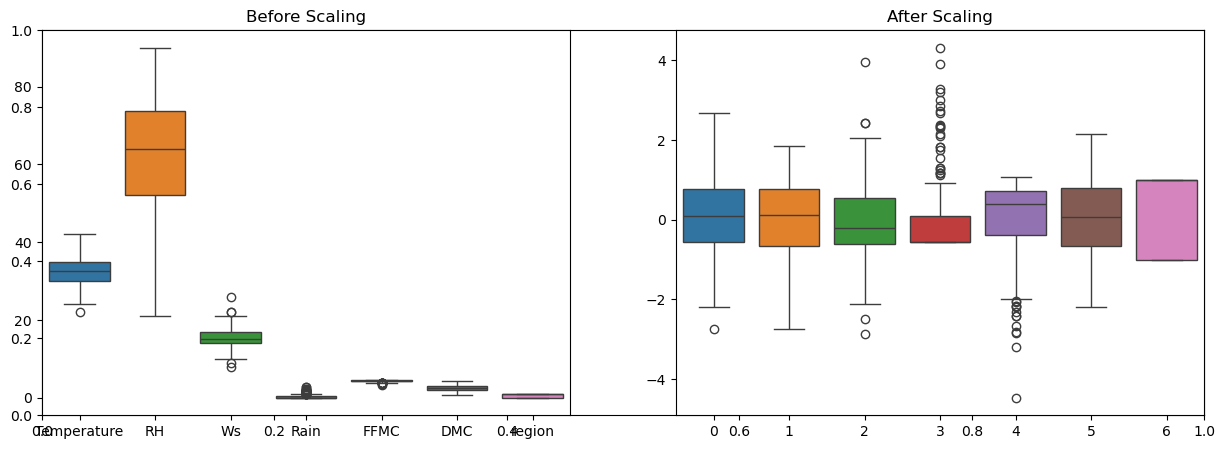

In [274]:
plt.show()

Mean absolute Error: 0.30492583213918717
Mean Squared Error: 0.1598415888190955
R squre : 0.8316055590650253


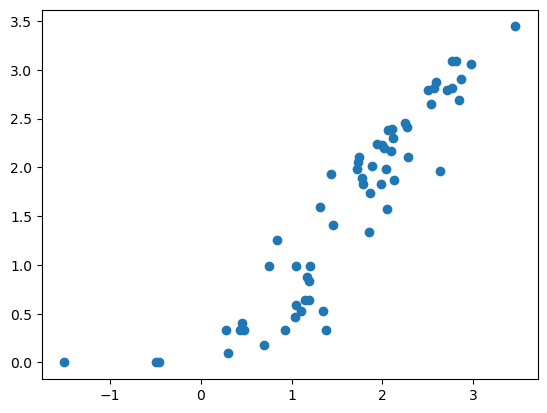

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model=LinearRegression()

model.fit(X_train_scale,y_train)

y_pred=model.predict(X_test_scale)

#finding the mae and mse
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'Mean absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R squre : {score}')
plt.scatter(y_pred,y_test)
plt.show()

In [278]:
X_prev_train,X_prev_test,y_prev_train,y_prev_test=train_test_split(prev_X,prev_y,test_size=0.25,random_state=42)

In [279]:
X_prev_train_scale=scale.fit_transform(X_prev_train)
X_prev_test_scale=scale.transform(X_prev_test)

In [280]:
model.fit(X_prev_train_scale,y_prev_train)

LinearRegression()

In [285]:
y_prev_pred=model.predict(X_prev_test_scale)

#finding the mae and mse
mae=mean_absolute_error(y_prev_test,y_prev_pred)
mse=mean_squared_error(y_prev_test,y_prev_pred)
score=r2_score(y_prev_test,y_prev_pred)
print(f'Mean absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R squre : {score}')
plt.scatter(y_prev_pred,y_prev_test)

Mean absolute Error: 0.5468236465249993
Mean Squared Error: 0.6742766873791594
R squre : 0.9847657384266951


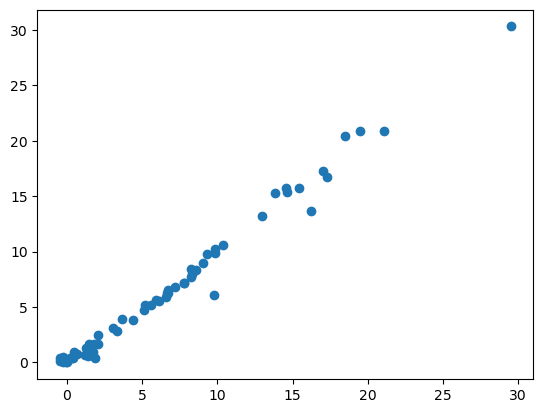

In [286]:
plt.show()

In [292]:
# lets check residuals.
residual1=y_test-y_pred
residual2=y_prev_test-y_prev_pred

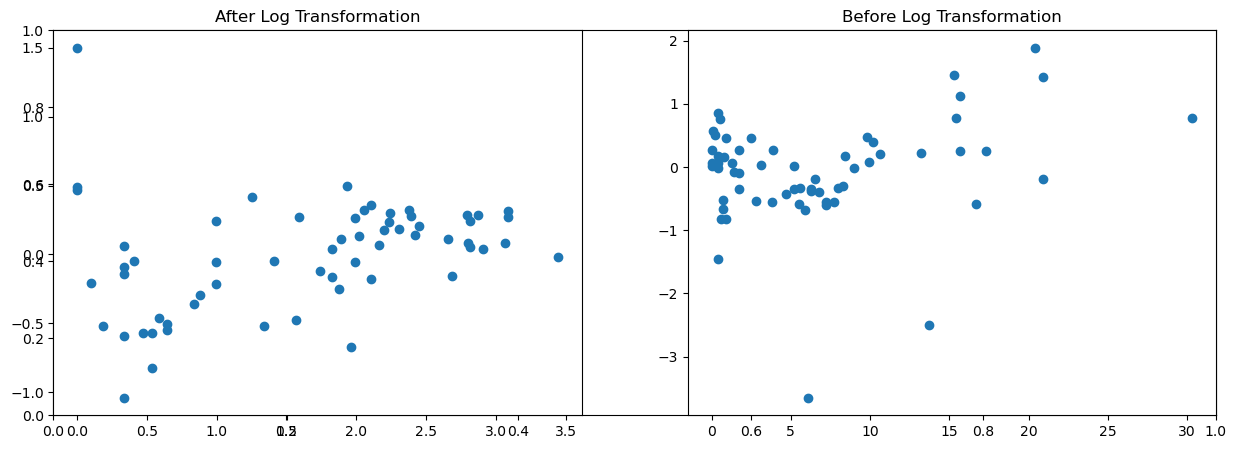

In [293]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y_test,residual1)
plt.title('After Log Transformation')
plt.subplot(1,2,2)
plt.scatter(y_prev_test,residual2)
plt.title('Before Log Transformation')
plt.show()


Mean absolute Error: 0.5642305340105715
Mean Squared Error: 0.6949198918152087
R squre : 0.9842993364555513


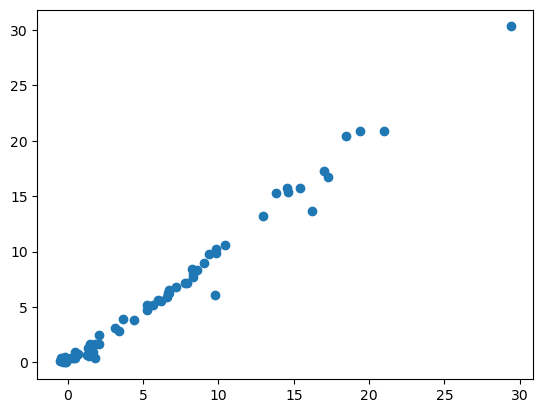

In [294]:
## Checking with ridge ,ridge cv,Lasso,Lasso CV,Elastic Net, Elasticnet cv
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model=Ridge()

model.fit(X_prev_train_scale,y_prev_train)

y_pred=model.predict(X_prev_test_scale)

#finding the mae and mse
mae=mean_absolute_error(y_prev_test,y_pred)
mse=mean_squared_error(y_prev_test,y_pred)
score=r2_score(y_prev_test,y_pred)
print(f'Mean absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R squre : {score}')
plt.scatter(y_pred,y_prev_test)
plt.show()

Mean absolute Error: 0.5642305340106
Mean Squared Error: 0.6949198918155305
R squre : 0.984299336455544


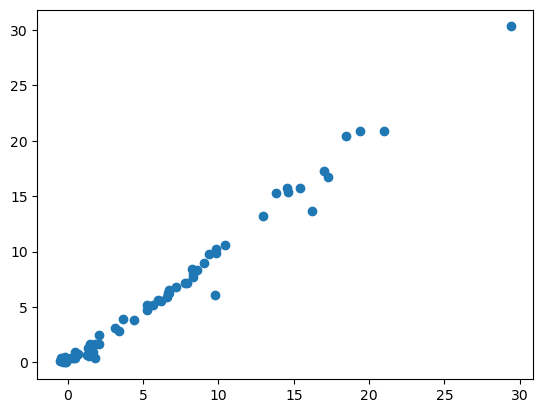

In [300]:
## Checking with ridge ,ridge cv,Lasso,Lasso CV,Elastic Net, Elasticnet cv
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

ridgeCV=RidgeCV()

ridgeCV.fit(X_prev_train_scale,y_prev_train)

y_pred=ridgeCV.predict(X_prev_test_scale)

#finding the mae and mse
mae=mean_absolute_error(y_prev_test,y_pred)
mse=mean_squared_error(y_prev_test,y_pred)
score=r2_score(y_prev_test,y_pred)
print(f'Mean absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R squre : {score}')
plt.scatter(y_pred,y_prev_test)
plt.show()

Mean absolute Error: 1.1331759949144085
Mean Squared Error: 2.248345891897475
R squre : 0.9492020263112388


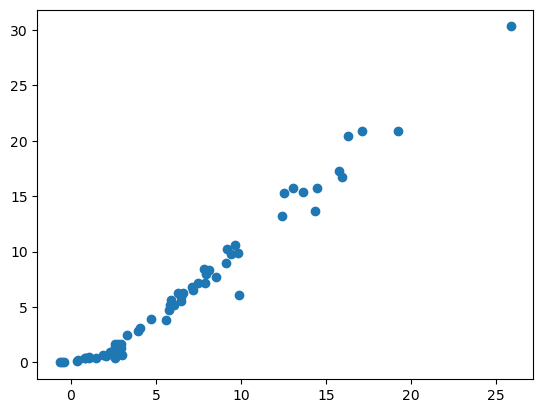

In [296]:
## Checking with ridge ,ridge cv,Lasso,Lasso CV,Elastic Net, Elasticnet cv
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model=Lasso()

model.fit(X_prev_train_scale,y_prev_train)

y_pred=model.predict(X_prev_test_scale)

#finding the mae and mse
mae=mean_absolute_error(y_prev_test,y_pred)
mse=mean_squared_error(y_prev_test,y_pred)
score=r2_score(y_prev_test,y_pred)
print(f'Mean absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R squre : {score}')
plt.scatter(y_pred,y_prev_test)
plt.show()

Mean absolute Error: 0.6199701158263432
Mean Squared Error: 0.7924995554743627
R squre : 0.9820946715928275


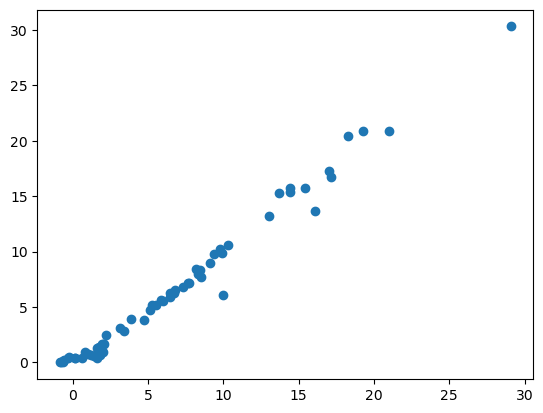

In [297]:
## Checking with ridge ,ridge cv,Lasso,Lasso CV,Elastic Net, Elasticnet cv
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model=LassoCV()

model.fit(X_prev_train_scale,y_prev_train)

y_pred=model.predict(X_prev_test_scale)

#finding the mae and mse
mae=mean_absolute_error(y_prev_test,y_pred)
mse=mean_squared_error(y_prev_test,y_pred)
score=r2_score(y_prev_test,y_pred)
print(f'Mean absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R squre : {score}')
plt.scatter(y_pred,y_prev_test)
plt.show()

Mean absolute Error: 1.8822353634896
Mean Squared Error: 5.517251101025224
R squre : 0.8753460589519703


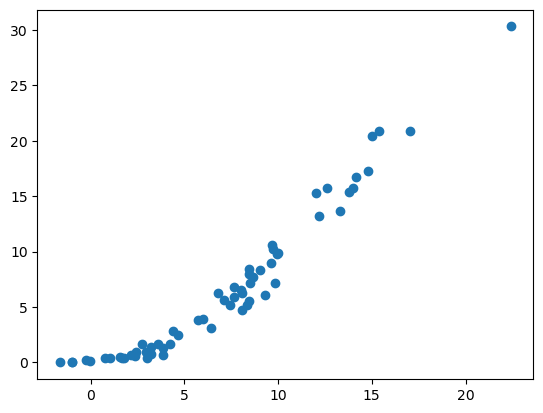

In [298]:
## Checking with ridge ,ridge cv,Lasso,Lasso CV,Elastic Net, Elasticnet cv
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model=ElasticNet()

model.fit(X_prev_train_scale,y_prev_train)

y_pred=model.predict(X_prev_test_scale)

#finding the mae and mse
mae=mean_absolute_error(y_prev_test,y_pred)
mse=mean_squared_error(y_prev_test,y_pred)
score=r2_score(y_prev_test,y_pred)
print(f'Mean absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R squre : {score}')
plt.scatter(y_pred,y_prev_test)
plt.show()

Mean absolute Error: 0.6575946731430905
Mean Squared Error: 0.8222830416276268
R squre : 0.9814217587854941


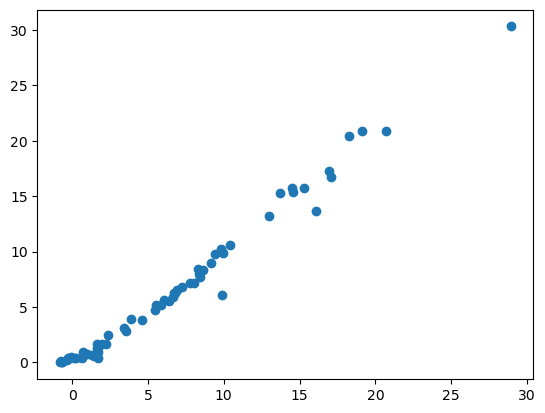

In [299]:
## Checking with ridge ,ridge cv,Lasso,Lasso CV,Elastic Net, Elasticnet cv
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model=ElasticNetCV()

model.fit(X_prev_train_scale,y_prev_train)

y_pred=model.predict(X_prev_test_scale)

#finding the mae and mse
mae=mean_absolute_error(y_prev_test,y_pred)
mse=mean_squared_error(y_prev_test,y_pred)
score=r2_score(y_prev_test,y_pred)
print(f'Mean absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R squre : {score}')
plt.scatter(y_pred,y_prev_test)
plt.show()

In [301]:
scale

StandardScaler()

In [302]:
ridgeCV

RidgeCV()

In [303]:
import pickle
pickle.dump(scale,open('scaler.pkl','wb'))
pickle.dump(ridgeCV,open('Ridge.pkl','wb'))